In [1]:
import pandas as pd

import cleantools as clnt
import logistic as lg

# Initial Example #

Before drop na columns 54216
Before outlier clean 37420
Total Size 37420
Training Size 28065
Number of 1s in target 11472.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.646765
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.044     
Dependent Variable:       From Venezia           AIC:                    48443.8916
Date:                     2020-06-25 13:02       BIC:                    48614.4908
No. Observations:         37420                  Log-Likelihood:         -24202.   
Df Model:                 19                     LL-Null:                -25316.   
Df Residuals:             37400                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
------------------------------------

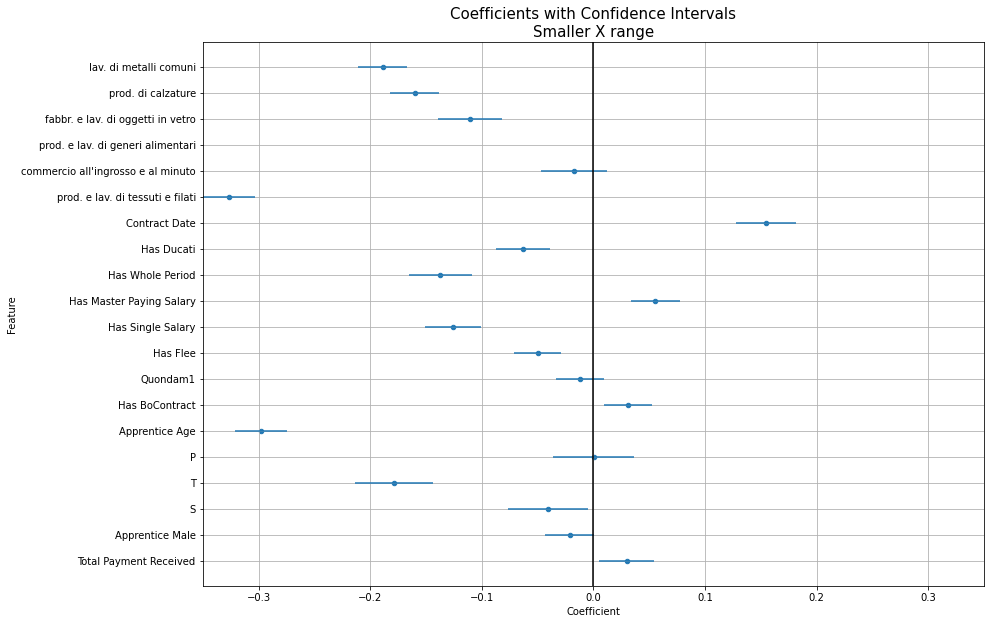

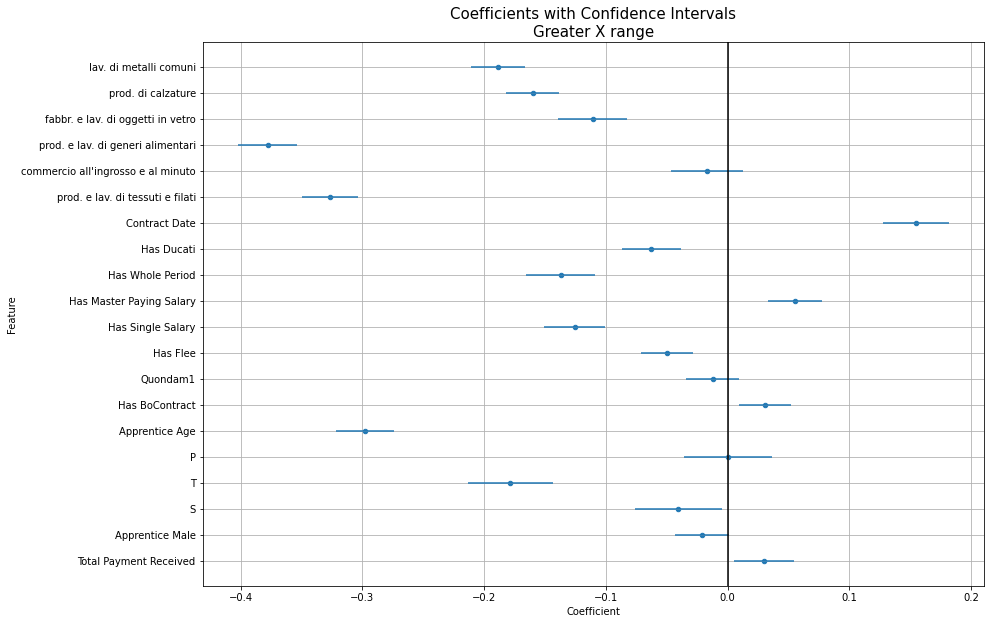

In [2]:
# Load the table
df = clnt.loadPickle("../data/pickles/table_of_all.pkl")
df = lg.dummyLabels(df)

# Create regression object
columns_needed = [
    'Total Payment Received', 'Apprentice Male', 'S', 'T',
    'P','Apprentice Age', 'Has BoContract', 'Quondam1',
    'Has Flee', 'Has Single Salary', 'Has Master Paying Salary',
    'Has Whole Period', 'Has Ducati', 'Contract Date', "From Venezia",
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
    "lav. di metalli comuni"
]
reg = lg.myRegressor(column_list=columns_needed)
reg.loadData(df, "From Venezia", outlier_list=[])

# Get a detailed report from statsmodels
reg.getReport()

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74      5517
         1.0       0.62      0.44      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.63      0.63      9355
weighted avg       0.65      0.66      0.65      9355



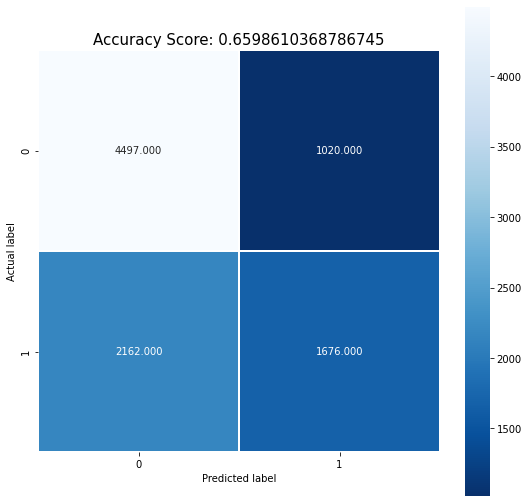

In [11]:
reg.applyLogistic()

Oversample Size 33186
Number of 1s in target 16593.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.646765
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.044     
Dependent Variable:       From Venezia           AIC:                    48443.8916
Date:                     2020-06-24 16:39       BIC:                    48614.4908
No. Observations:         37420                  Log-Likelihood:         -24202.   
Df Model:                 19                     LL-Null:                -25316.   
Df Residuals:             37400                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                       

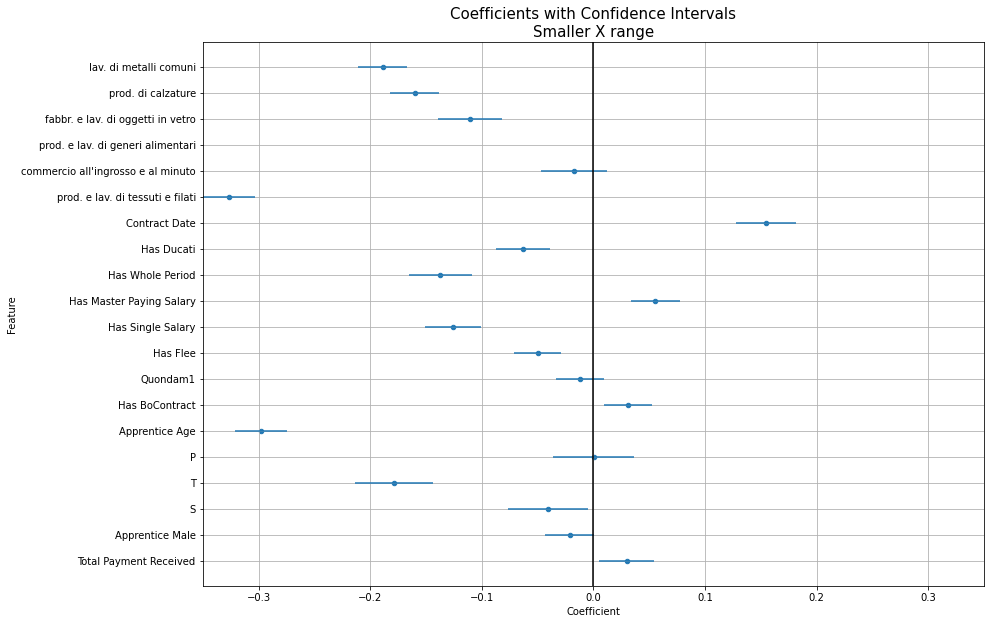

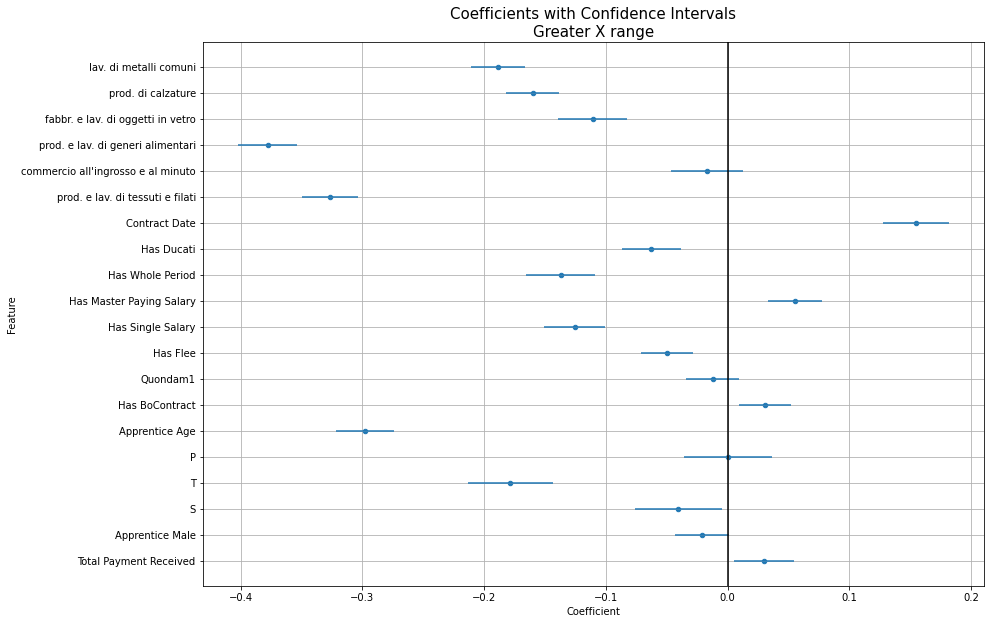

In [12]:
reg.overSample()
reg.getReport()

['T', 'Apprentice Age', 'Has Single Salary', 'Has Whole Period', 'Contract Date', 'prod. e lav. di tessuti e filati', 'prod. e lav. di generi alimentari', 'fabbr. e lav. di oggetti in vetro', 'prod. di calzature', 'lav. di metalli comuni']
Before outlier clean 37420
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      5517
         1.0       0.62      0.43      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.62      0.62      9355
weighted avg       0.65      0.66      0.64      9355



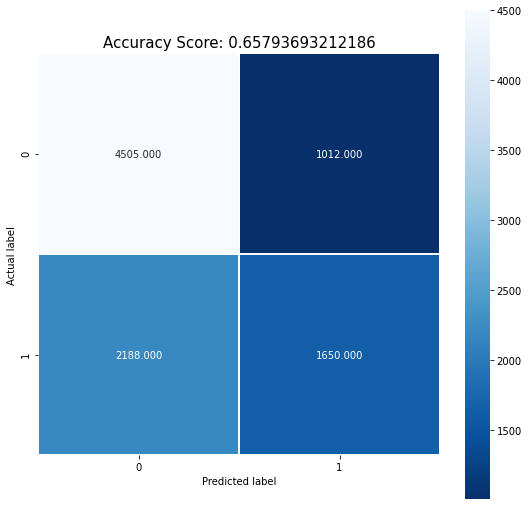

Optimization terminated successfully.
         Current function value: 0.648162
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.042     
Dependent Variable:        From Venezia          AIC:                   48528.4086
Date:                      2020-06-24 16:39      BIC:                   48613.7082
No. Observations:          37420                 Log-Likelihood:        -24254.   
Df Model:                  9                     LL-Null:               -25316.   
Df Residuals:              37410                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------

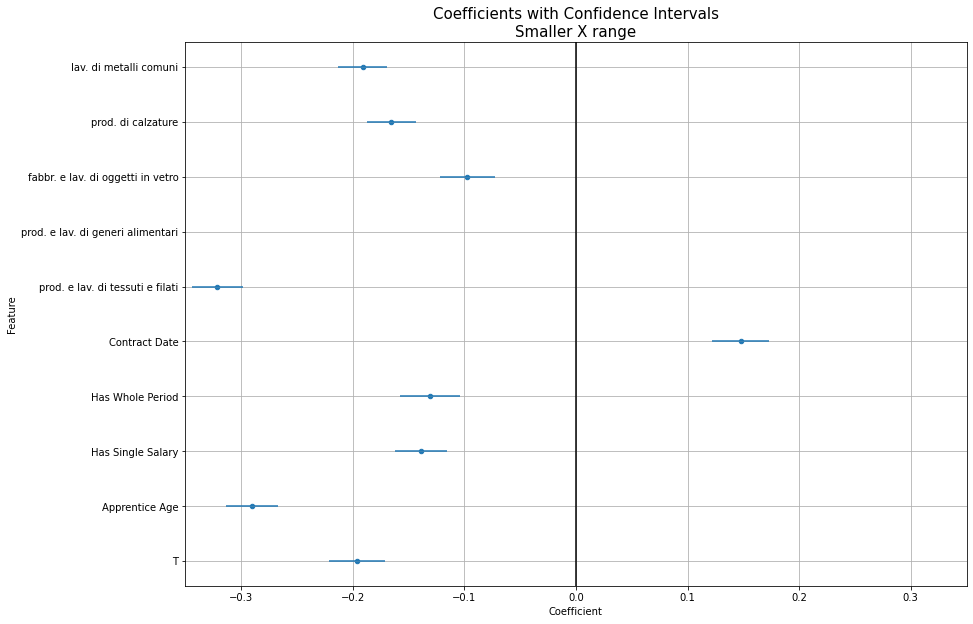

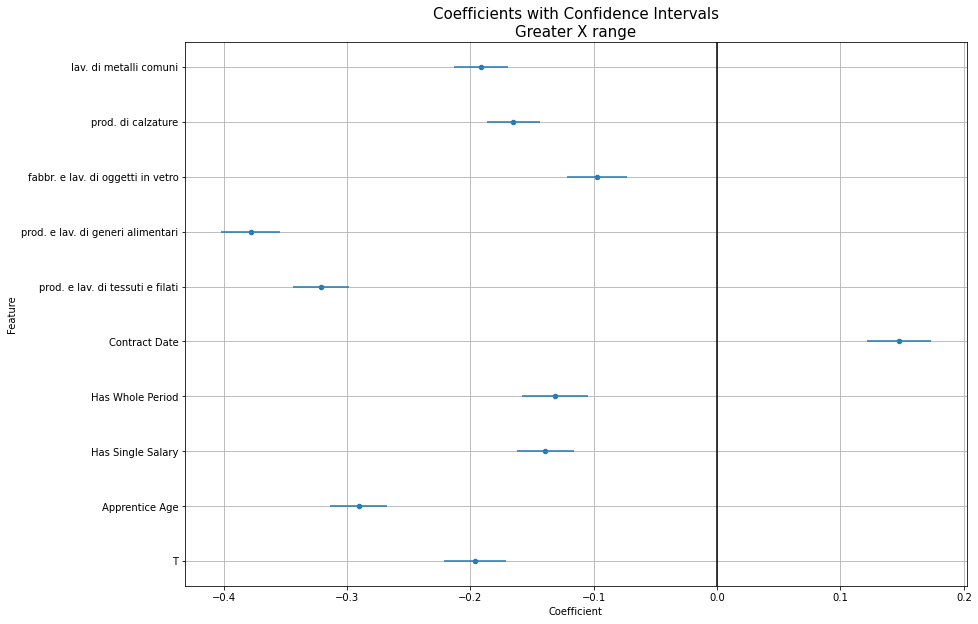

In [13]:
reg.selectFeatures()
reg.getReport()

# Adding Category as Feature #

In [14]:
# Load the table
df = clnt.loadPickle("../data/pickles/table_of_all.pkl")
categories = clnt.loadPickle("../data/pickles/generated_categories_appRel_femCon_fromVen.pkl")

# Get dummy Labels for professions, and eliminate From Venezia from Category
df = dummyLabels(df, other=True)
categories["Category"] = categories["Category"] - categories["From Venezia"] * 4
category_dummies = categories["Category"].astype(str).str.get_dummies()
category_dummies.columns = [f"Cat {a}." for a in range(len(category_dummies.keys()))]
df = df.join(category_dummies)

Before drop na columns 54216
Before outlier clean 37420
Total Size 37420
Training Size 28065
Number of 1s in target 11472.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.642747
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.050     
Dependent Variable:       From Venezia           AIC:                    48147.1549
Date:                     2020-06-24 16:39       BIC:                    48334.8140
No. Observations:         37420                  Log-Likelihood:         -24052.   
Df Model:                 21                     LL-Null:                -25316.   
Df Residuals:             37398                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
------------------------------------

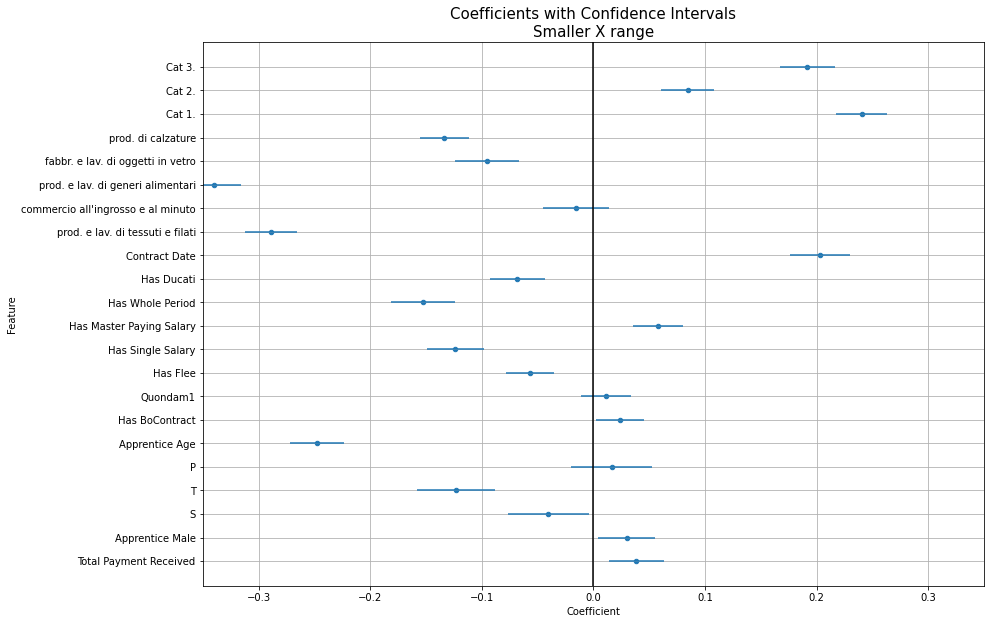

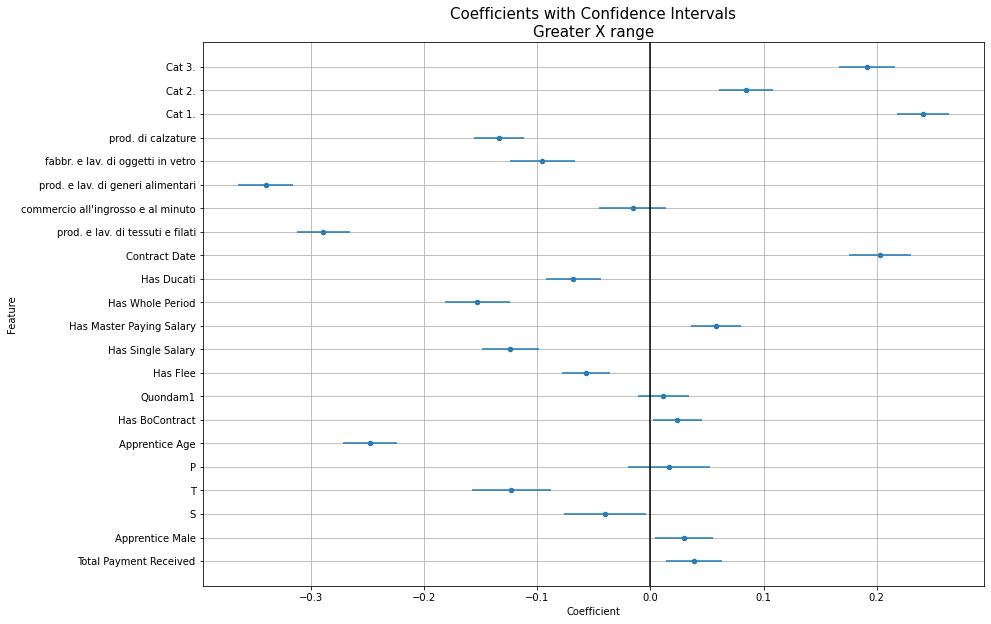

In [15]:
# Create regression object
columns_needed = [
    'Total Payment Received', 'Apprentice Male', 'S', 'T',
    'P','Apprentice Age', 'Has BoContract', 'Quondam1',
    'Has Flee', 'Has Single Salary', 'Has Master Paying Salary',
    'Has Whole Period', 'Has Ducati', 'Contract Date', "From Venezia",
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
#     "lav. di metalli comuni",
#     "Other Label",
#     "Cat 0.",
    "Cat 1.",
    "Cat 2.",
    "Cat 3."
]

# Logistic Regression
reg = lg.myRegressor(column_list=columns_needed)
reg.loadData(df, "From Venezia", outlier_list=[])
reg.getReport()

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74      5517
         1.0       0.62      0.44      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.63      0.63      9355
weighted avg       0.65      0.66      0.65      9355



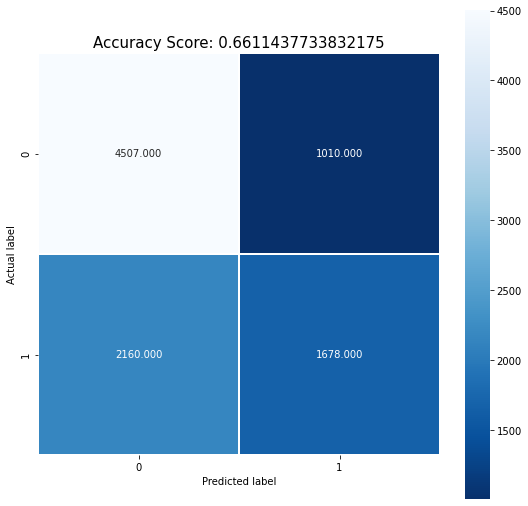

In [16]:
reg.applyLogistic()

Oversample Size 33186
Number of 1s in target 16593.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.642747
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.050     
Dependent Variable:       From Venezia           AIC:                    48147.1549
Date:                     2020-06-24 16:39       BIC:                    48334.8140
No. Observations:         37420                  Log-Likelihood:         -24052.   
Df Model:                 21                     LL-Null:                -25316.   
Df Residuals:             37398                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                       

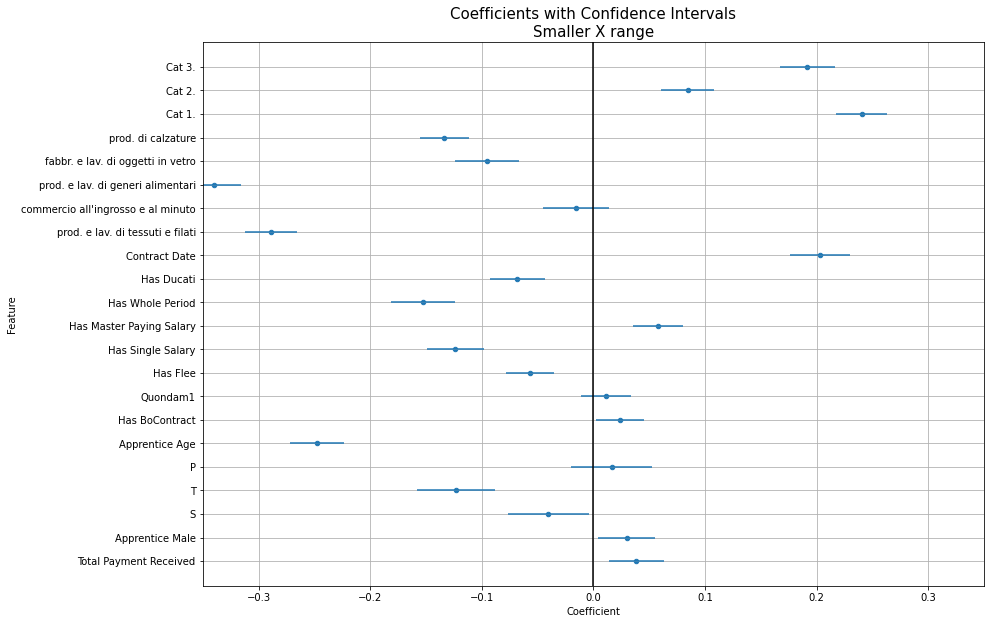

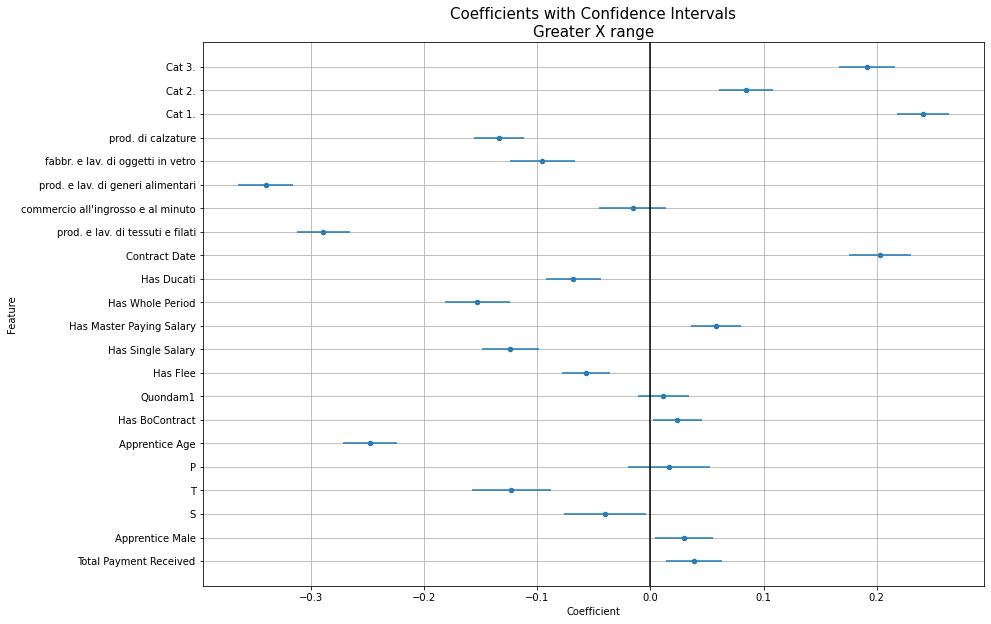

In [17]:
reg.overSample()
reg.getReport()

['T', 'Apprentice Age', 'Has Single Salary', 'Has Whole Period', 'Contract Date', 'prod. e lav. di tessuti e filati', 'prod. e lav. di generi alimentari', 'fabbr. e lav. di oggetti in vetro', 'prod. di calzature', 'Cat 1.', 'Cat 3.']
Before outlier clean 37420
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      5517
         1.0       0.63      0.43      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.62      0.62      9355
weighted avg       0.65      0.66      0.64      9355



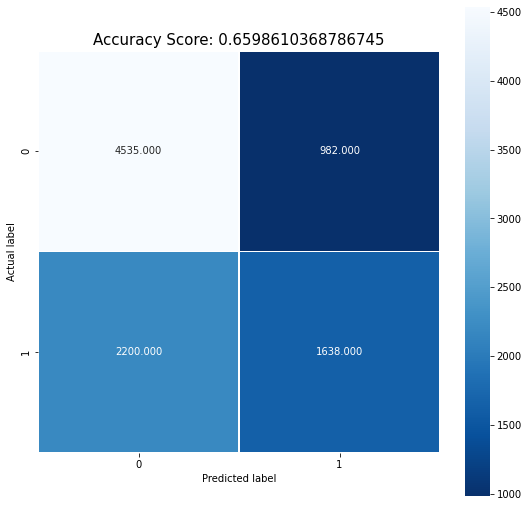

Optimization terminated successfully.
         Current function value: 0.645055
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.047     
Dependent Variable:        From Venezia          AIC:                   48297.8984
Date:                      2020-06-24 16:39      BIC:                   48391.7279
No. Observations:          37420                 Log-Likelihood:        -24138.   
Df Model:                  10                    LL-Null:               -25316.   
Df Residuals:              37409                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------

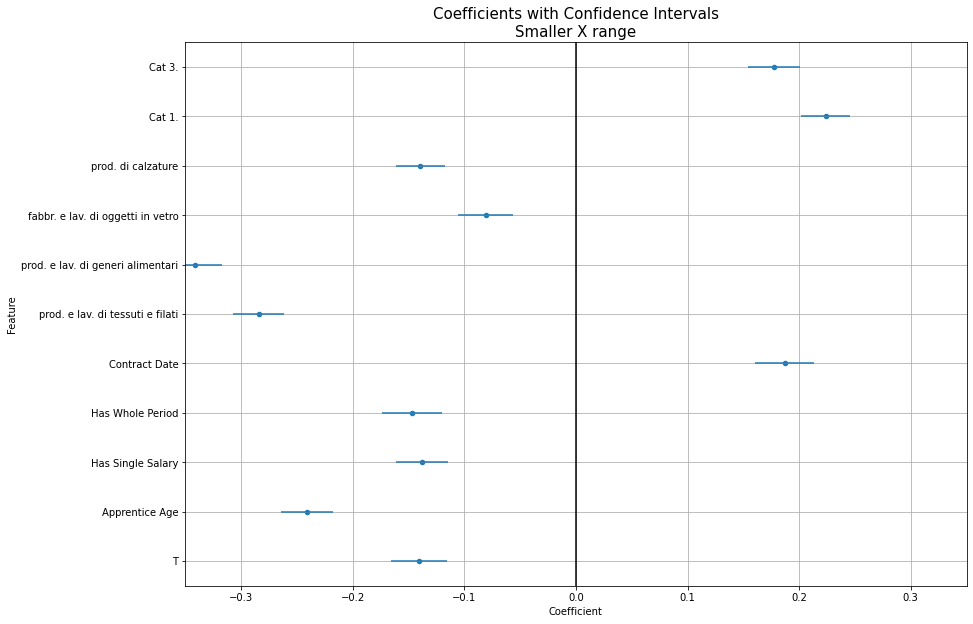

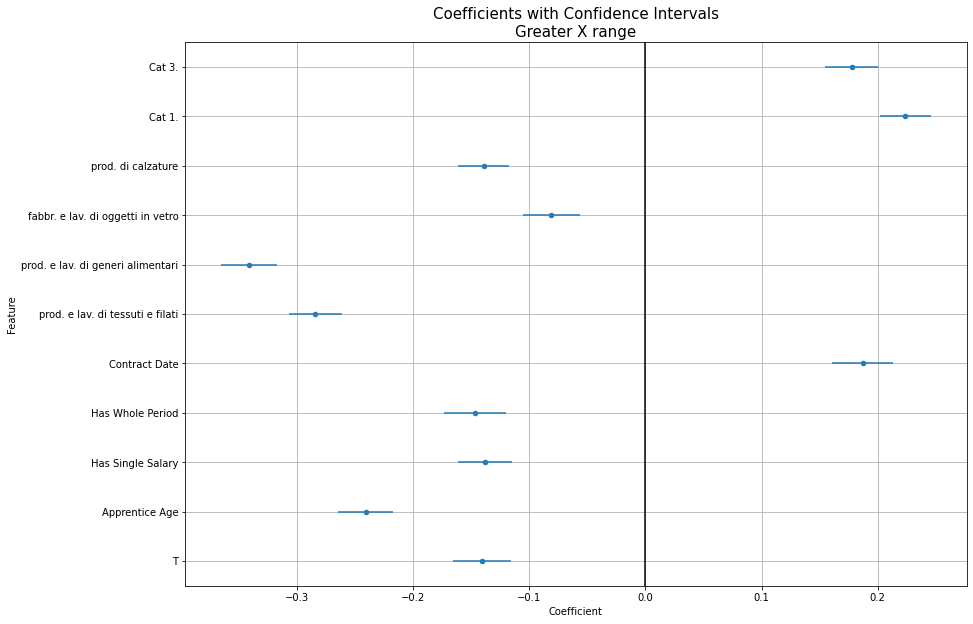

In [19]:
reg.selectFeatures()
reg.getReport()

# Experiment with Formula #

In [32]:
from statsmodels.formula.api import logit

# Load the table
df = clnt.loadPickle("../data/pickles/table_of_all.pkl")
df = lg.dummyLabels(df, other=True)

# Create regression object
columns_needed = [
    'Total Payment Received', 'Apprentice Male', 'S', 'T',
    'P','Apprentice Age', 'Has BoContract', 'Quondam1',
    'Has Flee', 'Has Single Salary', 'Has Master Paying Salary',
    'Has Whole Period', 'Has Ducati', 'Contract Date', "From_Venezia",
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
    "lav. di metalli comuni",
    "Other Label"
]
df["From_Venezia"] = df["From Venezia"].copy()
del df["From Venezia"]
reg = lg.myRegressor(column_list=columns_needed)
reg.loadData(df, "From_Venezia", outlier_list=[])
reg.x_data.columns = [a.replace("'", "_").replace(".", "").replace(" ", "_") for a in reg.x_data.columns]

Before drop na columns 54216
Before outlier clean 37420
Total Size 37420
Training Size 28065
Number of 1s in target 11472.0
Number of 0s in target 16593.0


In [35]:
formula = ("From_Venezia ~ " +
           " + ".join(reg.x_data.columns[:-7]) +
           " + Other_Label:(" +
           " + ".join(reg.x_data.columns[-6:-1]) + ")")
formula

'From_Venezia ~ Total_Payment_Received + Apprentice_Male + S + T + P + Apprentice_Age + Has_BoContract + Quondam1 + Has_Flee + Has_Single_Salary + Has_Master_Paying_Salary + Has_Whole_Period + Has_Ducati + Contract_Date + Other_Label:(commercio_all_ingrosso_e_al_minuto + prod_e_lav_di_generi_alimentari + fabbr_e_lav_di_oggetti_in_vetro + prod_di_calzature + lav_di_metalli_comuni)'

In [39]:
result = logit(formula, data=reg.x_data.join(reg.y_data)).fit()

Optimization terminated successfully.
         Current function value: 0.642368
         Iterations 5


In [37]:
print(results.summary2())

                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.051     
Dependent Variable:           From_Venezia               AIC:                        48114.7978
Date:                         2020-06-25 13:28           BIC:                        48285.3971
No. Observations:             37420                      Log-Likelihood:             -24037.   
Df Model:                     19                         LL-Null:                    -25316.   
Df Residuals:                 37400                      LLR p-value:                0.0000    
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               5.0000                                                           
-----------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.    z     P>|z|   

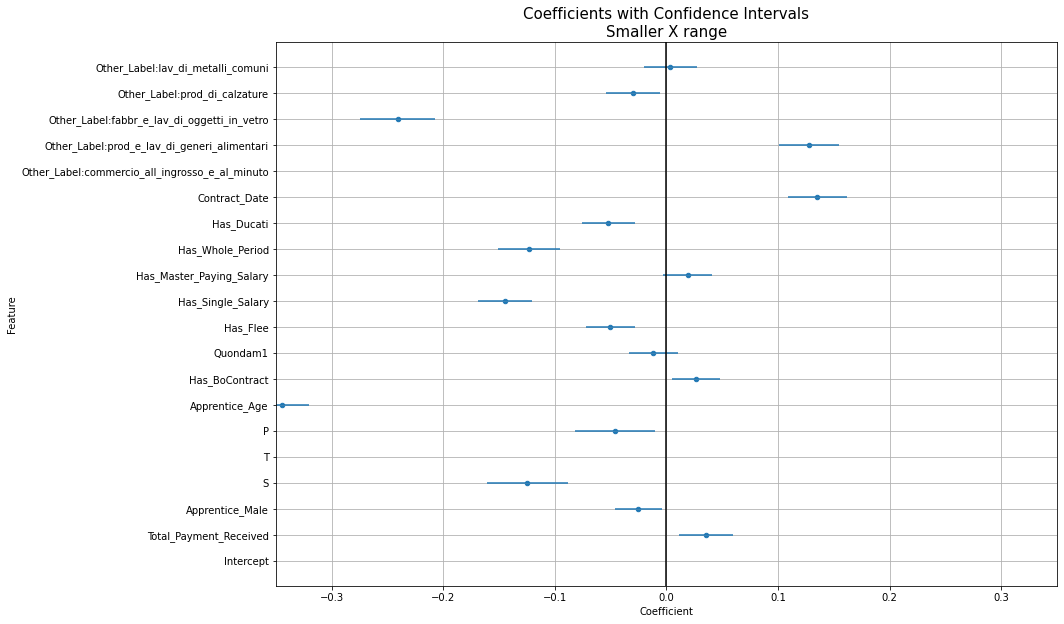

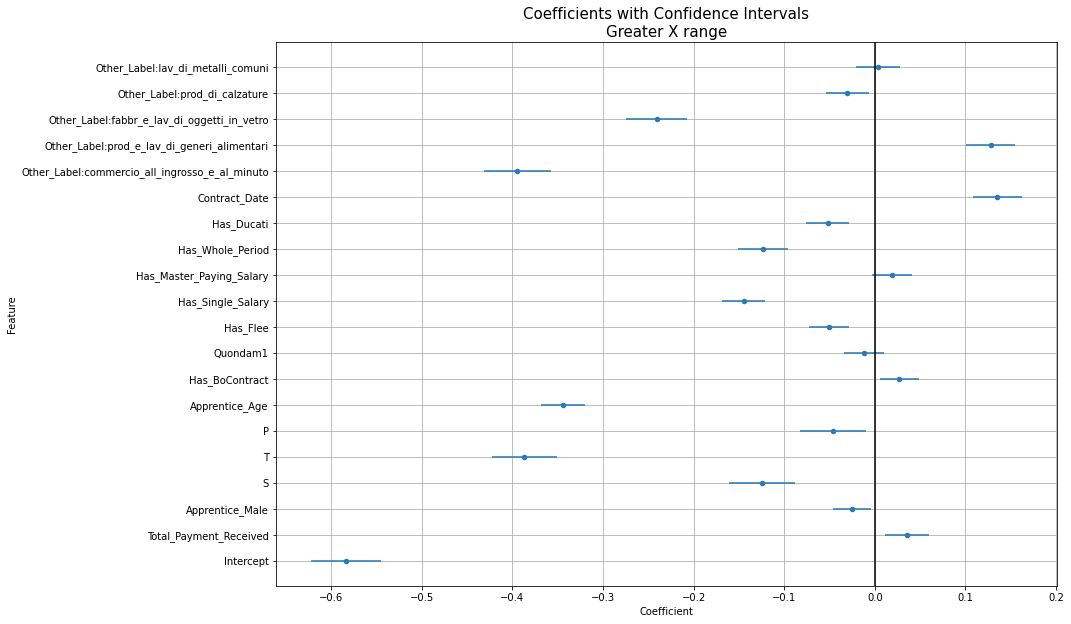

In [42]:
import matplotlib.pyplot as plt

# Load coefficients and format columns
coef = pd.DataFrame(result.params, columns=["Coef"])
error = result.conf_int()
error.columns = ["L", "H"]

# Acquire an approximate size of error
error["Final"] = (error["H"] - error["L"]) / 2
coef = coef.join(error[["Final"]]).reset_index()
coef.columns = ["Feature", "Coefficient", "Error"]

# Plot two graphs for reference
_, ax = plt.subplots(figsize=(14, 10))
ax.plot(0)
ax.axvline(x=0, color="black")
ax.set_title(
    "Coefficients with Confidence Intervals\nSmaller X range",
    fontsize=15,
)
coef.plot.scatter(
    x="Coefficient",
    y="Feature",
    ax=ax,
    xerr="Error",
    grid=True,
    xlim=(-0.35, 0.35),
)
_, ax2 = plt.subplots(figsize=(14, 10))
ax2.plot(0)
ax2.axvline(x=0, color="black")
ax2.set_title(
    "Coefficients with Confidence Intervals\nGreater X range",
    fontsize=15,
)
coef.plot.scatter(
    x="Coefficient", y="Feature", ax=ax2, xerr="Error", grid=True
)
plt.show()